In [1]:
from utils import read_graph_from_json, update_attributes, get_k_L_U
filepath = 'C:\\districting-data-2020\\'
state = 'TN'
district_type = 'SH'

In [2]:
from main import get_max_whole_UBs
results = dict()

# read graph
filename = state + '_county.json'
G = read_graph_from_json( filepath + filename )
update_attributes(G, state)

(k, L, U) = get_k_L_U(G, state, district_type)

# extract "urban" districts from these counties:
#   Davidson (47037), Shelby (47157), Hamilton (47065), Knox (47093), Rutherford (47149)
# AND, create incumbent plan for rural:=non-urban counties:
urban_fips = [ '47037', '47157', '47065', '47093', '47149' ]
rural_vertices = [ i for i in G.nodes if G.nodes[i]['GEOID20'][0:5] not in urban_fips ]
k_urban = 13+10+7+5+5
results[state, district_type] = get_max_whole_UBs(G.subgraph(rural_vertices), L, U, k-k_urban, verbose=False)    

Starting TN with k = 99 and deviation = 0.1
Thus, we have L = 66317 and U = 73296
Set parameter Username
Academic license - for non-commercial use only - expires 2026-04-01
Dropped 1 and reduced from {'47103', '47051', '47117', '47127', '47003', '47031'} to ['47103', '47051', '47117', '47003', '47031'].
Adding non-dominated, minimal constraints:
['47113']
['47009']
['47179']
['47163']
['47125']
['47119']
['47165']
['47103', '47051', '47117', '47003', '47031']
['47011']
['47059', '47073', '47029', '47089', '47057', '47063']
['47187']
['47141']
['47155']
['47167', '47097', '47075', '47047']
['47001']
['47189']
Time to generate initial inequalities: 3.73 seconds.
Dropped 1 and reduced from {'47103', '47051', '47117', '47127', '47003', '47031'} to ['47103', '47051', '47117', '47003', '47031'].
Adding non-dominated, minimal constraints:
['47113']
['47009']
['47179']
['47163']
['47125']
['47119']
['47165']
['47103', '47051', '47117', '47003', '47031']
['47011']
['47059', '47073', '47029', '4

In [3]:
print("results =", results)

results = {('TN', 'SH'): {'k': 59, 'L': 66317, 'U': 73296, '|C|': 90, 'm': 212, 'trivial_UB': 77, 'vicinity_constraints': [['47113'], ['47009'], ['47179'], ['47163'], ['47125'], ['47119'], ['47165'], ['47103', '47051', '47117', '47003', '47031'], ['47011'], ['47059', '47073', '47029', '47089', '47057', '47063'], ['47187'], ['47141'], ['47155'], ['47167', '47097', '47075', '47047'], ['47001'], ['47189']], 'vicinity_UB': 74, 'generalized_vicinity_constraints': [['47113'], ['47009'], ['47179'], ['47163'], ['47125'], ['47119'], ['47165'], ['47103', '47051', '47117', '47003', '47031'], ['47011'], ['47059', '47073', '47029', '47089', '47057', '47063'], ['47187'], ['47141'], ['47155'], ['47167', '47097', '47075', '47047'], ['47001'], ['47189']], 'generalized_vicinity_UB': 74, 'articulation_constraints': [['47113'], ['47009'], ['47179'], ['47163'], ['47125'], ['47119'], ['47165'], ['47103', '47051', '47117', '47003', '47031'], ['47011'], ['47059', '47073', '47029', '47089', '47057', '47063'], 

In [4]:
# Define a color palette (list of color hex codes or names)
color_palette = [
    #"#FF5733",  # Red-Orange
    "#3357FF",  # Blue
    "#F1C40F",  # Yellow
    "#9B59B6",  # Purple
    "#1ABC9C",  # Teal
    "#E67E22",  # Orange
    #"#2ECC71",  # Green
    #"#3498DB",  # Sky Blue
    "#E74C3C",   # Red
    "#33FF57"  # Lime Green
]

Starting TN with k = 99 and deviation = 0.1
Thus, we have L = 66317 and U = 73296


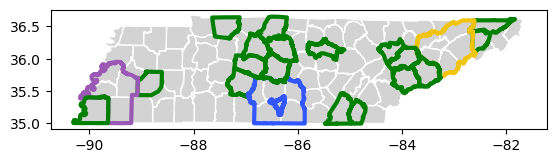

In [5]:
import geopandas as gpd
from shapely.ops import unary_union
import matplotlib.pyplot as plt

# read graph
filename = state + '_county.json'
G = read_graph_from_json( filepath + filename )
update_attributes(G, state)

# read geodataframe
filename = state + '_county.shp'
gdf = gpd.read_file( filepath + filename )

(k, L, U) = get_k_L_U(G, state, district_type)
ax = gdf.plot(color='lightgrey', edgecolor='white', aspect=1)
counter = 0

results[state, district_type]['vertex_cut_constraints'] += [ [f] for f in urban_fips ]

for I in results[state, district_type]['vertex_cut_constraints']:
    
    # Filter the counties 
    selected = gdf[gdf['GEOID20'].isin(I)]
    
    # 1. Dissolve the selected counties into a single polygon
    dissolved = selected.dissolve()
    
    # 2. Get the exterior boundary (Jordan curve)
    border = dissolved.boundary

    if len(I) == 1: # singleton
        border.plot(ax=ax, color='green', linewidth=3)
    else:  # larger
        color = color_palette[counter] # 'red'
        border.plot(ax=ax, color=color, linewidth=3)
        counter += 1

output_name = state + '_' + district_type + '_inequalities.png'
plt.savefig(output_name, dpi=300)  

In [6]:
constraints = dict()
for key in results.keys():
    constraints[key] = results[key]['vertex_cut_constraints']
    
print("constraints =",constraints)

constraints = {('TN', 'SH'): [['47113'], ['47009'], ['47179'], ['47163'], ['47125'], ['47119'], ['47165'], ['47103', '47051', '47117', '47003', '47031'], ['47011'], ['47059', '47073', '47029', '47089', '47057', '47063'], ['47187'], ['47141'], ['47155'], ['47167', '47097', '47075', '47047'], ['47001'], ['47189'], ['47037'], ['47157'], ['47065'], ['47093'], ['47149']]}


In [7]:
for key, val in constraints.items():
    print(key, val)

('TN', 'SH') [['47113'], ['47009'], ['47179'], ['47163'], ['47125'], ['47119'], ['47165'], ['47103', '47051', '47117', '47003', '47031'], ['47011'], ['47059', '47073', '47029', '47089', '47057', '47063'], ['47187'], ['47141'], ['47155'], ['47167', '47097', '47075', '47047'], ['47001'], ['47189'], ['47037'], ['47157'], ['47065'], ['47093'], ['47149']]
